In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [36]:
train_data_path = "train"
validation_data_path = "val"

In [37]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [38]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')  
 
training_data.class_indices

Found 3768 images belonging to 6 classes.


{'Aphids': 0,
 'Army worm': 1,
 'Bacterial blight': 2,
 'Healthy': 3,
 'Powdery mildew': 4,
 'Target spot': 5}

In [40]:
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 228 images belonging to 6 classes.


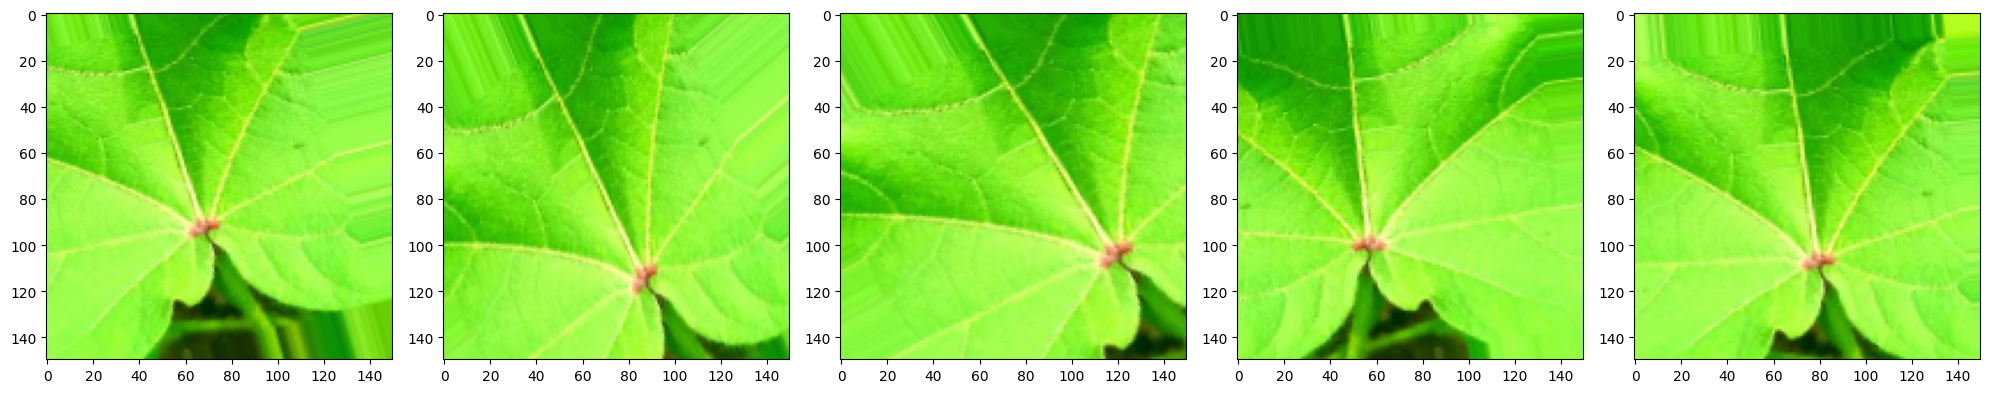

In [41]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [42]:
model_path = r"pred_cotton.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
        # Part 1
        Conv2D(filters = 32, kernel_size=3, input_shape=[150, 150, 3]),
        MaxPooling2D(pool_size=(2, 2)),

        # Part 2
        Conv2D(filters = 64, kernel_size=3),
        MaxPooling2D(pool_size=(2, 2)),

        # Part 3
        Conv2D(filters = 128, kernel_size=3),
        MaxPooling2D(pool_size=(2, 2)),

        # Part 4
        Conv2D(filters = 256, kernel_size=3),
        MaxPooling2D(pool_size=(2, 2)),
        
        Dropout(0.5),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dropout(0.1),
        Dense(units=256, activation='relu'),
        Dropout(0.25),
        Dense(units=6, activation='softmax')
    ])

c:\Users\Administrator\OneDrive\Desktop\Efficient8\Deep Learning\Deep_Learning_2024\Disease Prediction\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(training_data, epochs=20, verbose=1, 
          validation_data= valid_data, callbacks=callbacks_list) 

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - accuracy: 0.2997 - loss: 1.6415
Epoch 1: val_accuracy improved from -inf to 0.57018, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 113s 917ms/step - accuracy: 0.3002 - loss: 1.6406 - val_accuracy: 0.5702 - val_loss: 1.2047
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 0.4858 - loss: 1.3264
Epoch 2: val_accuracy improved from 0.57018 to 0.59211, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 111s 941ms/step - accuracy: 0.4859 - loss: 1.3261 - val_accuracy: 0.5921 - val_loss: 1.0226
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.5111 - loss: 1.2690
Epoch 3: val_accuracy improved from 0.59211 to 0.68860, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 100s 843ms/step - accuracy: 0.5113 - loss: 1.2686 - val_accuracy: 0.6886 - val_loss: 0.9151
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.5298 - loss: 1.1998
Epoch 4: val_accuracy improved from 0.68860 to 0.72368, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 101s 856ms/step - accuracy: 0.5300 - loss: 1.1996 - val_accuracy: 0.7237 - val_loss: 0.9083
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.5873 - loss: 1.1030
Epoch 5: val_accuracy improved from 0.72368 to 0.79386, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 111s 941ms/step - accuracy: 0.5873 - loss: 1.1029 - val_accuracy: 0.7939 - val_loss: 0.7200
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6055 - loss: 1.0567
Epoch 6: val_accuracy did not improve from 0.79386
118/118 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.6054 - loss: 1.0567 - val_accuracy: 0.7807 - val_loss: 0.6806
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6253 - loss: 1.0042
Epoch 7: val_accuracy did not improve from 0.79386
118/118 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6253 - loss: 1.0042 - val_accuracy: 0.7895 - val_loss: 0.6421
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6274 - loss: 0.9859
Epoch 8: val_accuracy improved from 0.79386 to 0.79825, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.6274 - loss: 0.9858 - val_accuracy: 0.7982 - val_loss: 0.6768
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6320 - loss: 0.9597
Epoch 9: val_accuracy did not improve from 0.79825
118/118 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.6321 - loss: 0.9594 - val_accuracy: 0.7982 - val_loss: 0.6244
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.6472 - loss: 0.9213
Epoch 10: val_accuracy improved from 0.79825 to 0.82895, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 74s 628ms/step - accuracy: 0.6472 - loss: 0.9213 - val_accuracy: 0.8289 - val_loss: 0.5697
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.6633 - loss: 0.9129
Epoch 11: val_accuracy improved from 0.82895 to 0.85088, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 77s 655ms/step - accuracy: 0.6633 - loss: 0.9129 - val_accuracy: 0.8509 - val_loss: 0.5627
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.6730 - loss: 0.8572
Epoch 12: val_accuracy did not improve from 0.85088
118/118 ━━━━━━━━━━━━━━━━━━━━ 72s 610ms/step - accuracy: 0.6730 - loss: 0.8573 - val_accuracy: 0.8421 - val_loss: 0.5499
Epoch 13/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.6805 - loss: 0.8643
Epoch 13: val_accuracy did not improve from 0.85088
118/118 ━━━━━━━━━━━━━━━━━━━━ 86s 729ms/step - accuracy: 0.6806 - loss: 0.8641 - val_accuracy: 0.8421 - val_loss: 0.5068
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.7029 - loss: 0.7995
Epoch 14: val_accuracy improved from 0.85088 to 0.86404, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 673ms/step - accuracy: 0.7028 - loss: 0.7997 - val_accuracy: 0.8640 - val_loss: 0.5039
Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.7139 - loss: 0.7815
Epoch 15: val_accuracy did not improve from 0.86404
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 676ms/step - accuracy: 0.7137 - loss: 0.7818 - val_accuracy: 0.8377 - val_loss: 0.5165
Epoch 16/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.6994 - loss: 0.8041
Epoch 16: val_accuracy improved from 0.86404 to 0.86842, saving model to pred_cotton.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 75s 638ms/step - accuracy: 0.6993 - loss: 0.8043 - val_accuracy: 0.8684 - val_loss: 0.4734
Epoch 17/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.7048 - loss: 0.8018
Epoch 17: val_accuracy did not improve from 0.86842
118/118 ━━━━━━━━━━━━━━━━━━━━ 72s 608ms/step - accuracy: 0.7048 - loss: 0.8018 - val_accuracy: 0.8596 - val_loss: 0.4397
Epoch 18/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.7143 - loss: 0.7595
Epoch 18: val_accuracy did not improve from 0.86842
118/118 ━━━━━━━━━━━━━━━━━━━━ 72s 607ms/step - accuracy: 0.7142 - loss: 0.7596 - val_accuracy: 0.8596 - val_loss: 0.4829
Epoch 19/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.7145 - loss: 0.7701
Epoch 19: val_accuracy did not improve from 0.86842
118/118 ━━━━━━━━━━━━━━━━━━━━ 76s 644ms/step - accuracy: 0.7145 - loss: 0.7701 - val_accuracy: 0.8509 - val_loss: 0.4397
Epoch 20/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.7194 - loss: 0.7402
Epoch 20

In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,086,228 (23.22 MB)

 Trainable params: 2,028,742 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,057,486 (15.48 MB)

In [57]:
# No augmentation for test/validation dataset, only rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [58]:
# Load the test dataset
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 960 images belonging to 6 classes.
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.7170 - loss: 0.7209
Test Accuracy: 73.96%


In [59]:
model.save(model_path)

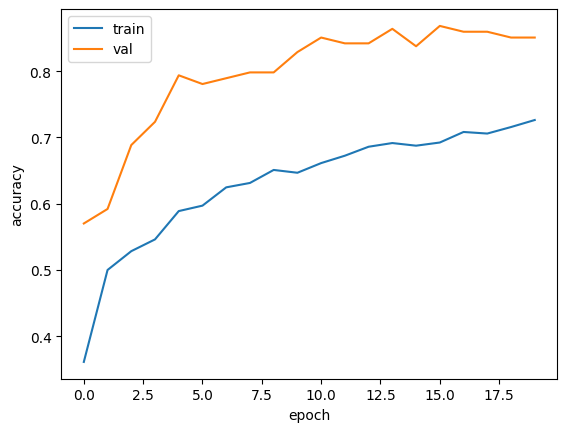

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

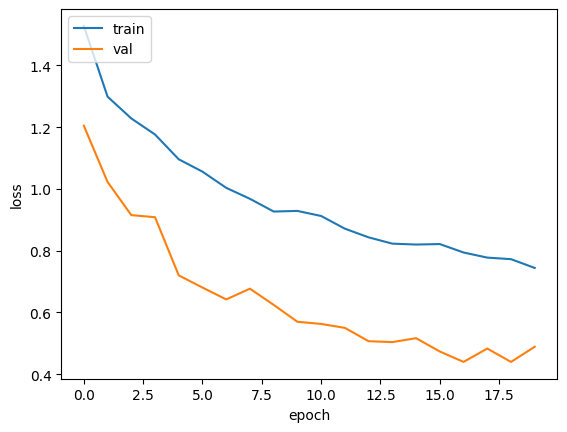

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_disease(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = ['Aphids', 'Army Worm', 'Bacterial Blight', 'Healthy Leaf', 'Powdery Mildew', 'Target Spot']  # Class labels
    return class_labels[class_index], prediction


In [63]:
from tensorflow.keras.models import load_model
image_path = r"uploads/6_img.jpeg"
trained_model = load_model('pred_cotton.h5')
print(predict_disease(trained_model, image_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
('Powdery Mildew', array([[1.7069627e-02, 4.9862647e-03, 2.6186607e-03, 4.9340958e-04,
        9.4813454e-01, 2.6697513e-02]], dtype=float32))
